In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpmd_api as io

In [2]:
series = io.Series("diags/openPMD/monitor.h5", io.Access.read_only)

In [3]:
iterations = list(series.iterations)

In [4]:
len(iterations)

50

In [5]:
# OK, 10 iterations for 10 turns in simulation

In [6]:
print(iterations)

[1, 27, 53, 79, 105, 131, 157, 183, 209, 235, 261, 287, 313, 339, 365, 391, 417, 443, 469, 495, 521, 547, 573, 599, 625, 651, 677, 703, 729, 755, 781, 807, 833, 859, 885, 911, 937, 963, 989, 1015, 1041, 1067, 1093, 1119, 1145, 1171, 1197, 1223, 1249, 1275]


In [7]:
# what are these numbers?
# there are five elements in the beamline, each had nslice=25
# 1 after monitor, + 5*25+1 + 5*25+1 + 5*25+1?

In [8]:
itest = []
i = 0
for r in range(10):
    i = i + 1
    itest.append(i)
    for s in range(5):
        i = i + 25
print(itest)

[1, 127, 253, 379, 505, 631, 757, 883, 1009, 1135]


In [9]:
# OK now I know what they are

In [10]:
# Look at reduced beam quantties for each iteration

In [11]:
std_x = []
std_y = []
for i in iterations:
    std_x.append(series.iterations[i].particles['beam'].get_attribute('sig_x'))
    std_y.append(series.iterations[i].particles['beam'].get_attribute('sig_y'))

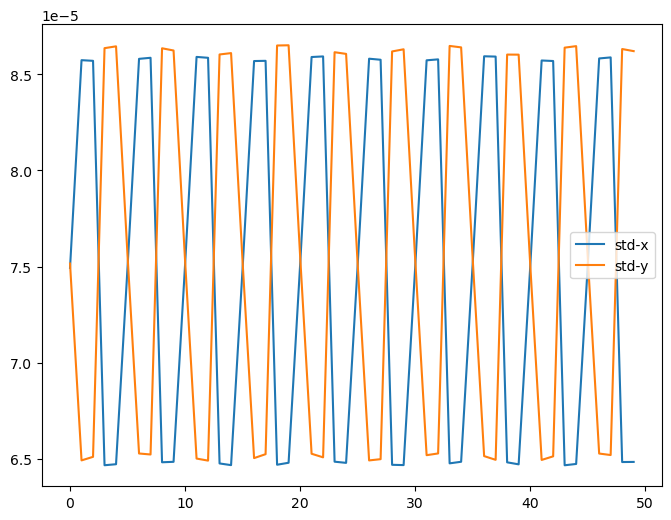

In [12]:
plt.plot(std_x, label='std-x')
plt.plot(std_y, label='std-y')
plt.legend(loc='best')

In [13]:
#series.close()

In [14]:
# How many particles are in the diagnostics?
beams_df = []
for i in iterations:
    beams_df.append(series.iterations[i].particles['beam'].to_df())

In [15]:
beams_df[0]['position_x'].shape

(10000,)

In [16]:
emit_x = []
emit_y = []
beta_x = []
beta_y = []
for i in iterations:
    emit_x.append(series.iterations[i].particles['beam'].get_attribute('emittance_x'))
    beta_x.append(series.iterations[i].particles['beam'].get_attribute('beta_x'))
    emit_y.append(series.iterations[i].particles['beam'].get_attribute('emittance_y'))
    beta_y.append(series.iterations[i].particles['beam'].get_attribute('beta_y'))    

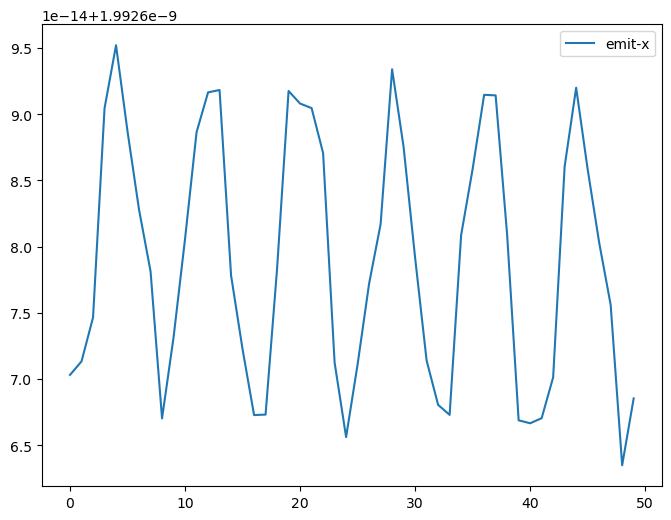

In [17]:
plt.plot(emit_x, label='emit-x')
plt.legend(loc='best')

In [18]:
emit_x

[1.992670307946327e-09,
 1.992671331478428e-09,
 1.9926746449576478e-09,
 1.992690449867001e-09,
 1.992695213757298e-09,
 1.9926886958986636e-09,
 1.9926827856647745e-09,
 1.9926781375103028e-09,
 1.9926670202911335e-09,
 1.9926731397943284e-09,
 1.9926805892940395e-09,
 1.9926886471096453e-09,
 1.9926916546040693e-09,
 1.992691833447143e-09,
 1.992677820652298e-09,
 1.9926722431270467e-09,
 1.992667270123919e-09,
 1.9926673091568905e-09,
 1.9926783315607277e-09,
 1.992691760830943e-09,
 1.9926908097597758e-09,
 1.9926904680563844e-09,
 1.992687073044561e-09,
 1.9926712492652844e-09,
 1.9926656078011566e-09,
 1.9926711024737236e-09,
 1.9926772031602536e-09,
 1.9926816961224477e-09,
 1.9926934010899402e-09,
 1.992687518725648e-09,
 1.9926791521457097e-09,
 1.9926713917288704e-09,
 1.99266804260108e-09,
 1.9926672855998794e-09,
 1.9926808667579083e-09,
 1.992685863739348e-09,
 1.9926914699535482e-09,
 1.9926914276828798e-09,
 1.992680894548073e-09,
 1.9926668750619986e-09,
 1.99266665268

In [32]:
ref_particle = pd.read_csv('diags/ref_particle.0.0', delimiter=' ')

In [33]:
ref_particle.shape

(1301, 13)

In [24]:
type(ref_particle)

pandas.core.frame.DataFrame

Text(0, 0.5, 'x')

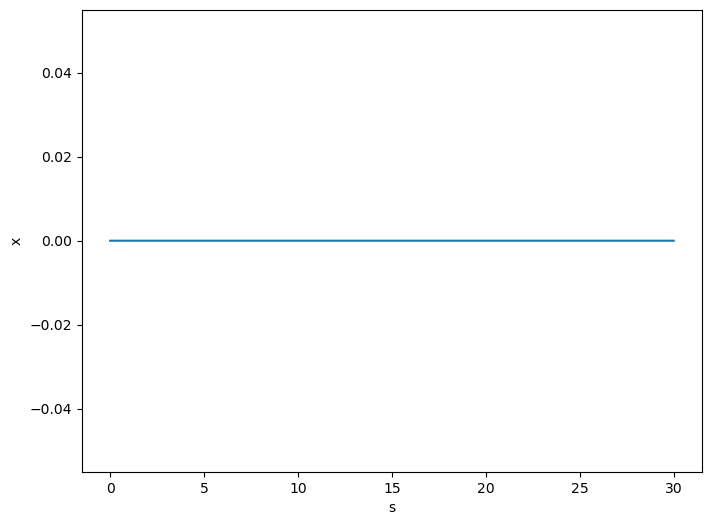

In [35]:
plt.plot(ref_particle['s'], ref_particle['x'])
plt.xlabel('s')
plt.ylabel('x')

In [34]:
ref_particle.columns

Index(['step', 's', 'beta', 'gamma', 'beta_gamma', 'x', 'y', 'z', 't', 'px',
       'py', 'pz', 'pt'],
      dtype='object')

In [ ]:
ref_particle.shape

In [27]:
ref_particle

,step s beta gamma beta_gamma x y z t px py pz pt
0,0 0 0.99999996737668118 3914.9023671183672 391...
1,1 0 0.99999996737668118 3914.9023671183672 391...
2,2 0.01 0.99999996737668118 3914.9023671183672 ...
3,3 0.02 0.99999996737668118 3914.9023671183672 ...
4,4 0.029999999999999999 0.99999996737668118 391...
...,...
1296,1296 29.959999999999887 0.99999996737668118 39...
1297,1297 29.969999999999889 0.99999996737668118 39...
1298,1298 29.97999999999989 0.99999996737668118 391...
1299,1299 29.989999999999892 0.99999996737668118 39...


In [28]:
ref_particle.shape

(1301, 1)

Text(0, 0.5, 'z')

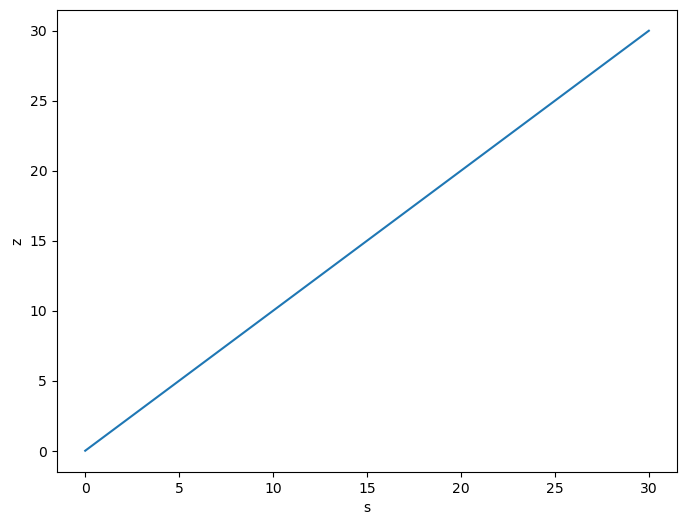

In [36]:
plt.plot(ref_particle['s'], ref_particle['z'])
plt.xlabel('s')
plt.ylabel('z')

Text(0, 0.5, 't')

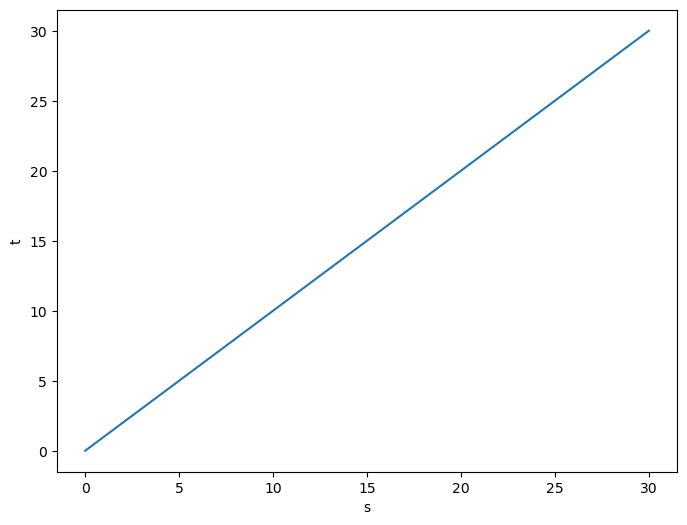

In [37]:
plt.plot(ref_particle['s'], ref_particle['t'])
plt.xlabel('s')
plt.ylabel('t')